In [1]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= 10  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [3]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight 
results=[1]*35+[0]*14

In [27]:
#DataFrame
data=[length,weight,results]
df = pd.DataFrame(data)
df = df.T
df

,0,1,2
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [5]:
datas=df.iloc[:,0:2]
datas

results=df.iloc[:,2]
results

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
Name: 2, dtype: float64

In [7]:
#자동 분리
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(
    datas,results,stratify=results 
    #random_state=42  훈련세트, 테스트 세트 할때마다 섞이지 않도록 해줌.
    #stratify: 설정데이터를 가지고 랜덤으로 데이터를 섞어줌.
)
train_input

,0,1
14,32.0,600.0
36,10.5,7.5
43,12.0,9.8
20,34.0,575.0
24,35.0,700.0
25,35.0,725.0
1,26.3,290.0
18,33.5,610.0
39,11.2,9.8
7,30.0,390.0


In [9]:
results=df.iloc[:,2]
results

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
Name: 2, dtype: float64

In [10]:
#1. 데이터 전처리 - Nan, 0 타입, 표준화 작업, 훈련세트, 테스트세트 구성
#2. 데이터 학습시키기
clf= KNeighborsClassifier()
clf.fit(train_input,train_target)

#3. 데이터 예측하기
predict=clf.predict(test_input)
predict
#4. 정확도 측정
score=clf.score(test_input,test_target)
print("정답률:  ",score)

정답률:   1.0


In [11]:
#25,150의 데이터는 knn판별할 때 이웃하는 데이터는 indexes
distances,indexes = clf.kneighbors([[25,150]])
indexes

array([[13, 12, 14,  6, 34]], dtype=int64)

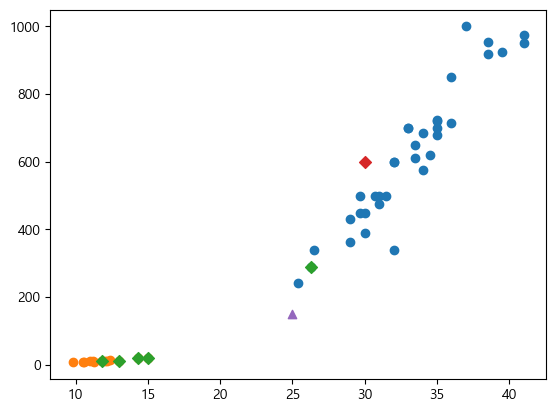

In [12]:
#25,125의 고기를 측정하시오.
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1],marker='D')
plt.scatter(30,600, marker='D')
plt.scatter(25,150, marker='^')
# plt.xticks([0,1000])

In [13]:
#실험 데이터로 확인 
predict = clf.predict([[25,150]])
print("판별: ",predict)

판별:  [0.]


In [14]:
train_input[0].mean()

27.344444444444445

In [15]:
train_input.mean()

0     27.344444
1    451.783333
dtype: float64

In [16]:
#표준점수: 훈련데이터 - 평균 /표준편차
type(train_input)

mean = np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)
std

0     10.004317
1    316.201183
dtype: float64

In [17]:
train_scaled=(train_input -mean)/std
# test_scaled=(train_input -mean)/std

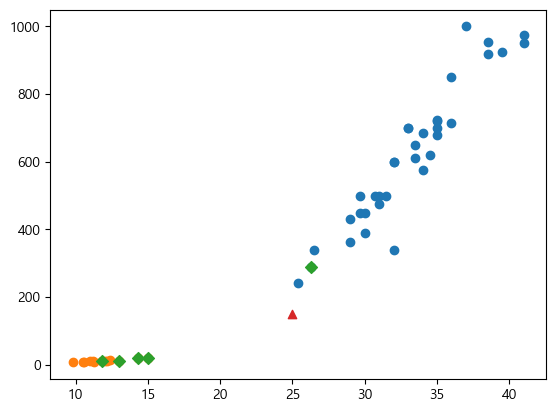

In [18]:
#25,125의 고기를 측정하시오.
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1],marker='D')
# plt.scatter(30,600, marker='D')
plt.scatter(25,150, marker='^')
# plt.xticks([0,1000])

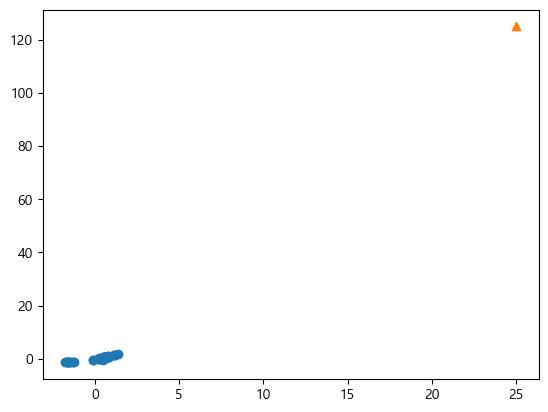

In [19]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(25,125,marker='^')

In [20]:
new=([25,150]-mean/std)
new

0     22.266735
1    148.571216
dtype: float64

In [21]:
clf.fit(train_scaled,train_target)

KNeighborsClassifier()

In [22]:
test_saled=(test_input-mean)/std

In [23]:
score=clf.score(test_saled,test_target)
print("정답률: ",score)

정답률:  1.0


In [24]:
predict=clf.predict([new])
print("예측값: ",predict)

예측값:  [1.]


In [25]:
distances,indexes=clf.kneighbors([new])
indexes

array([[11, 31, 29, 33,  5]], dtype=int64)

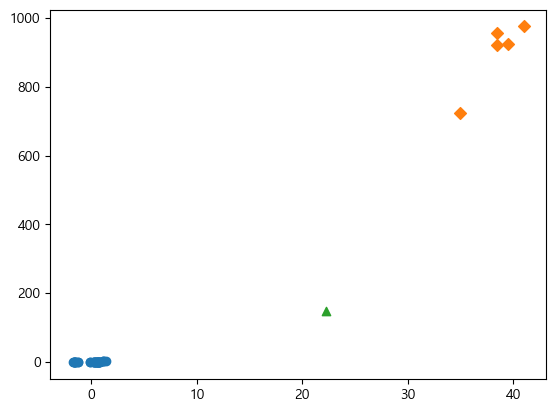

In [26]:
#25,125의 고기를 측정하시오.
plt.scatter(train_scaled.iloc[:,0], train_scaled.iloc[:,1])
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1],marker='D')
plt.scatter(new[0],new[1], marker='^')